In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
desafio_details_df = pd.read_csv("desafio_details.csv")
desafio_details_df

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0
...,...,...,...,...,...,...,...,...,...
4686,4686,34392248,Ingleses,Lindo e acogedor apto en zona norte de la Isla,2.0,2.0,NaN,False,0.0
4687,4687,44538969,Canasvieiras,"Ótimo apto no centro de Canas, a 450m do mar",1.0,1.0,NaN,False,0.0
4688,4688,16609826,Jurerê,Agradável Apartamento em Jurerê Internacional,3.0,2.0,5.0,True,30.0
4689,4689,31239515,Canasvieiras,Cobertura no centro 3 dormitorios com AR.,3.0,2.0,NaN,True,2.0


In [5]:
desafio_priceav_df = pd.read_csv("desafio_priceav.csv")
desafio_priceav_df

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0
...,...,...,...,...,...,...,...
354515,64596,4298115,40199361,blank,2021-03-26,200.0,0
354516,64597,4298116,40199361,blank,2021-03-27,200.0,0
354517,64598,4298117,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1
354518,64599,4298118,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1


In [6]:
desafio_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4691 non-null   int64  
 1   airbnb_listing_id    4691 non-null   int64  
 2   suburb               4691 non-null   object 
 3   ad_name              4691 non-null   object 
 4   number_of_bedrooms   4508 non-null   float64
 5   number_of_bathrooms  4690 non-null   float64
 6   star_rating          2570 non-null   float64
 7   is_superhost         4691 non-null   bool   
 8   number_of_reviews    4684 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 297.9+ KB


In [7]:
desafio_priceav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354520 entries, 0 to 354519
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         354520 non-null  int64  
 1   Unnamed: 0.1       354520 non-null  int64  
 2   airbnb_listing_id  354520 non-null  int64  
 3   booked_on          354520 non-null  object 
 4   date               354520 non-null  object 
 5   price_string       354520 non-null  float64
 6   occupied           354520 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 18.9+ MB


In [8]:
contagem_listing = desafio_details_df[["airbnb_listing_id", "suburb"]].groupby("suburb").count().sort_values(by="airbnb_listing_id").reset_index()
contagem_listing

,suburb,airbnb_listing_id
0,Centro,278
1,Lagoa da Conceição,309
2,Jurerê,539
3,Canasvieiras,1177
4,Ingleses,2388


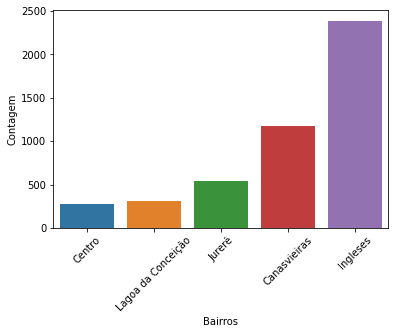

In [9]:
contagem_listing_grafico = sns.barplot(x=contagem_listing["suburb"], y=contagem_listing["airbnb_listing_id"]);
contagem_listing_grafico.set(xlabel="Bairros", ylabel="Contagem")
plt.xticks(rotation=45)
plt.show()

In [10]:
desafio_df = pd.merge(desafio_details_df, desafio_priceav_df, on="airbnb_listing_id")
desafio_df

,Unnamed: 0_x,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Unnamed: 0_y,Unnamed: 0.1,booked_on,date,price_string,occupied
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,54466,3628239,2020-12-04 00:00:00,2020-12-04,270.0,1
1,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,54467,3628240,2020-12-04 00:00:00,2020-12-05,270.0,1
2,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,54468,3628241,2020-12-04 00:00:00,2020-12-06,270.0,1
3,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,54469,3628242,2020-12-04 00:00:00,2020-12-07,270.0,1
4,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,54470,3628243,2020-12-04 00:00:00,2020-12-08,270.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354515,3845,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,38574,2275517,2021-02-28 00:00:00,2021-03-26,150.0,1
354516,3845,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,38575,2275518,2021-02-28 00:00:00,2021-03-27,150.0,1
354517,3845,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,38576,2275519,2021-02-28 00:00:00,2021-03-28,150.0,1
354518,3845,40277915,Ingleses,2 dormitório a 100 metros do mar (202B),2.0,2.0,NaN,False,0.0,38577,2275520,2021-02-28 00:00:00,2021-03-29,150.0,1


In [11]:
desafio_df = desafio_df.drop_duplicates()

In [12]:
desafio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289919 entries, 0 to 354433
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0_x         289919 non-null  int64  
 1   airbnb_listing_id    289919 non-null  int64  
 2   suburb               289919 non-null  object 
 3   ad_name              289919 non-null  object 
 4   number_of_bedrooms   277998 non-null  float64
 5   number_of_bathrooms  289845 non-null  float64
 6   star_rating          178052 non-null  float64
 7   is_superhost         289919 non-null  bool   
 8   number_of_reviews    289597 non-null  float64
 9   Unnamed: 0_y         289919 non-null  int64  
 10  Unnamed: 0.1         289919 non-null  int64  
 11  booked_on            289919 non-null  object 
 12  date                 289919 non-null  object 
 13  price_string         289919 non-null  float64
 14  occupied             289919 non-null  int64  
dtypes: bool(1), float

In [13]:
desafio_df = desafio_df.fillna(value=0)

In [14]:
desafio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289919 entries, 0 to 354433
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0_x         289919 non-null  int64  
 1   airbnb_listing_id    289919 non-null  int64  
 2   suburb               289919 non-null  object 
 3   ad_name              289919 non-null  object 
 4   number_of_bedrooms   289919 non-null  float64
 5   number_of_bathrooms  289919 non-null  float64
 6   star_rating          289919 non-null  float64
 7   is_superhost         289919 non-null  bool   
 8   number_of_reviews    289919 non-null  float64
 9   Unnamed: 0_y         289919 non-null  int64  
 10  Unnamed: 0.1         289919 non-null  int64  
 11  booked_on            289919 non-null  object 
 12  date                 289919 non-null  object 
 13  price_string         289919 non-null  float64
 14  occupied             289919 non-null  int64  
dtypes: bool(1), float

In [15]:
desafio_df["booked_on"] = desafio_df["booked_on"].str.replace("blank", "")

In [16]:
faturamento_por_agendamento = desafio_df[["airbnb_listing_id", "booked_on", "date", "suburb", "price_string"]].groupby(["airbnb_listing_id", "booked_on", "date", "suburb"]).sum().sort_values(by = "price_string").reset_index()
faturamento_por_agendamento = faturamento_por_agendamento[faturamento_por_agendamento.booked_on != ""]
faturamento_por_agendamento

,airbnb_listing_id,booked_on,date,suburb,price_string
19,30964548,2021-01-04 00:00:00,2021-02-21,Canasvieiras,50.0
20,32843473,2020-03-31 00:00:00,2021-02-20,Ingleses,50.0
21,32843473,2020-03-31 00:00:00,2021-02-21,Ingleses,50.0
22,32843473,2020-03-31 00:00:00,2021-02-22,Ingleses,50.0
23,32843473,2020-03-31 00:00:00,2021-02-23,Ingleses,50.0
...,...,...,...,...,...
284061,40894598,2020-03-29 00:00:00,2021-02-20,Ingleses,2000.0
284063,40892444,2020-04-01 00:00:00,2021-03-17,Ingleses,2000.0
284065,40892444,2020-04-01 00:00:00,2021-03-18,Ingleses,2000.0
284068,40892444,2020-04-01 00:00:00,2021-03-19,Ingleses,2000.0


In [17]:
faturamento_por_id = faturamento_por_agendamento[["airbnb_listing_id", "suburb", "price_string"]].groupby(["airbnb_listing_id", "suburb"]).sum().sort_values(by="price_string").reset_index()
faturamento_por_id

,airbnb_listing_id,suburb,price_string
0,42112099,Ingleses,98.0
1,13097427,Ingleses,150.0
2,41232719,Centro,160.0
3,2693585,Centro,190.0
4,39647983,Canasvieiras,195.0
...,...,...,...
3183,28908271,Ingleses,77230.0
3184,32374298,Ingleses,78330.0
3185,16567628,Ingleses,79650.0
3186,5199040,Ingleses,87540.0


In [18]:
faturamento_medio = faturamento_por_id[["suburb", "price_string"]].groupby("suburb").mean().sort_values(by="price_string").reset_index()
faturamento_medio["price_string"] = faturamento_medio["price_string"].round(decimals=2)
faturamento_medio

,suburb,price_string
0,Centro,8666.49
1,Lagoa da Conceição,10447.67
2,Canasvieiras,13327.55
3,Ingleses,14743.46
4,Jurerê,17924.31


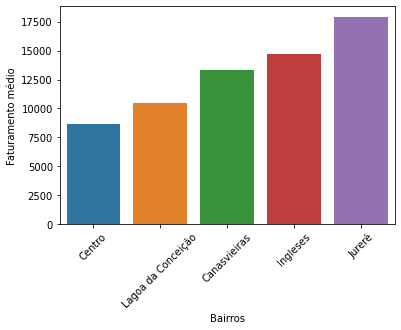

In [19]:
faturamento_medio_grafico = sns.barplot(x=faturamento_medio["suburb"], y=faturamento_medio["price_string"]);
faturamento_medio_grafico.set(xlabel="Bairros", ylabel="Faturamento médio")
plt.xticks(rotation=45)
plt.show()

In [63]:
relacoes_numericas = desafio_df[["airbnb_listing_id", "suburb", "booked_on", "date", "number_of_bedrooms", "number_of_bathrooms", "number_of_reviews", "star_rating", "is_superhost", "price_string"]].groupby(["airbnb_listing_id", "suburb", "booked_on", "date", "number_of_bedrooms", "number_of_bathrooms", "number_of_reviews", "star_rating",]).sum().sort_values(by="price_string").reset_index()
relacoes_numericas = relacoes_numericas[relacoes_numericas.booked_on != ""]
relacoes_numericas["booked_on"] = pd.to_datetime(relacoes_numericas["booked_on"], format = "%Y-%m-%d %H:%M:%S")
relacoes_numericas["date"] = pd.to_datetime(relacoes_numericas["date"], format = "%Y-%m-%d")
relacoes_numericas

,airbnb_listing_id,suburb,booked_on,date,number_of_bedrooms,number_of_bathrooms,number_of_reviews,star_rating,is_superhost,price_string
19,30964548,Canasvieiras,2021-01-04,2021-02-21,1.0,1.0,17.0,4.5,0,50.0
20,32843473,Ingleses,2020-03-31,2021-02-20,1.0,1.0,12.0,4.5,0,50.0
21,32843473,Ingleses,2020-03-31,2021-02-21,1.0,1.0,12.0,4.5,0,50.0
22,32843473,Ingleses,2020-03-31,2021-02-22,1.0,1.0,12.0,4.5,0,50.0
23,32843473,Ingleses,2020-03-31,2021-02-23,1.0,1.0,12.0,4.5,0,50.0
...,...,...,...,...,...,...,...,...,...,...
284061,40894598,Ingleses,2020-03-29,2021-02-20,1.0,2.0,0.0,0.0,0,2000.0
284063,40892444,Ingleses,2020-04-01,2021-03-17,2.0,3.0,0.0,0.0,0,2000.0
284065,40892444,Ingleses,2020-04-01,2021-03-18,2.0,3.0,0.0,0.0,0,2000.0
284068,40892444,Ingleses,2020-04-01,2021-03-19,2.0,3.0,0.0,0.0,0,2000.0


2022-01-18 10:41:02.464969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-18 10:41:02.465010: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     |████████████████████████████████| 22.2 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/romulo/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [76]:
faturamento_e_caracteristica = relacoes_numericas[["airbnb_listing_id", "suburb", "number_of_bedrooms", "number_of_bathrooms", "number_of_reviews", "star_rating", "is_superhost", "price_string"]].groupby(["airbnb_listing_id", "suburb", "number_of_bedrooms", "number_of_bathrooms", "number_of_reviews", "star_rating", "is_superhost"]).sum().reset_index()
faturamento_e_caracteristica

,airbnb_listing_id,suburb,number_of_bedrooms,number_of_bathrooms,number_of_reviews,star_rating,is_superhost,price_string
0,108658,Canasvieiras,2.0,2.0,0.0,0.0,0,24600.0
1,128631,Ingleses,4.0,2.0,2.0,0.0,0,28000.0
2,279586,Canasvieiras,3.0,2.0,52.0,4.5,0,6850.0
3,317970,Ingleses,3.0,2.0,15.0,4.5,0,3112.0
4,333619,Canasvieiras,1.0,1.0,26.0,5.0,1,12076.0
...,...,...,...,...,...,...,...,...
3626,45561358,Ingleses,1.0,1.0,16.0,5.0,2,3180.0
3627,45563187,Jurerê,1.0,1.0,9.0,4.5,1,23390.0
3628,45567371,Ingleses,2.0,2.0,0.0,0.0,0,600.0
3629,45575044,Lagoa da Conceição,2.0,2.0,14.0,5.0,1,28940.0


In [77]:
le = preprocessing.LabelEncoder()
faturamento_e_caracteristica["suburb_encoded"] = le.fit_transform(faturamento_e_caracteristica["suburb"])
faturamento_e_caracteristica.dtypes

airbnb_listing_id        int64
suburb                  object
number_of_bedrooms     float64
number_of_bathrooms    float64
number_of_reviews      float64
star_rating            float64
is_superhost             int64
price_string           float64
suburb_encoded           int64
dtype: object

In [83]:
desafio_df["ad_name"].str.lower()

0                     lindo apartamento em jurerê
1                     lindo apartamento em jurerê
2                     lindo apartamento em jurerê
3                     lindo apartamento em jurerê
4                     lindo apartamento em jurerê
                           ...                   
354429    2 dormitório a 100 metros do mar (202b)
354430    2 dormitório a 100 metros do mar (202b)
354431    2 dormitório a 100 metros do mar (202b)
354432    2 dormitório a 100 metros do mar (202b)
354433    2 dormitório a 100 metros do mar (202b)
Name: ad_name, Length: 289919, dtype: object

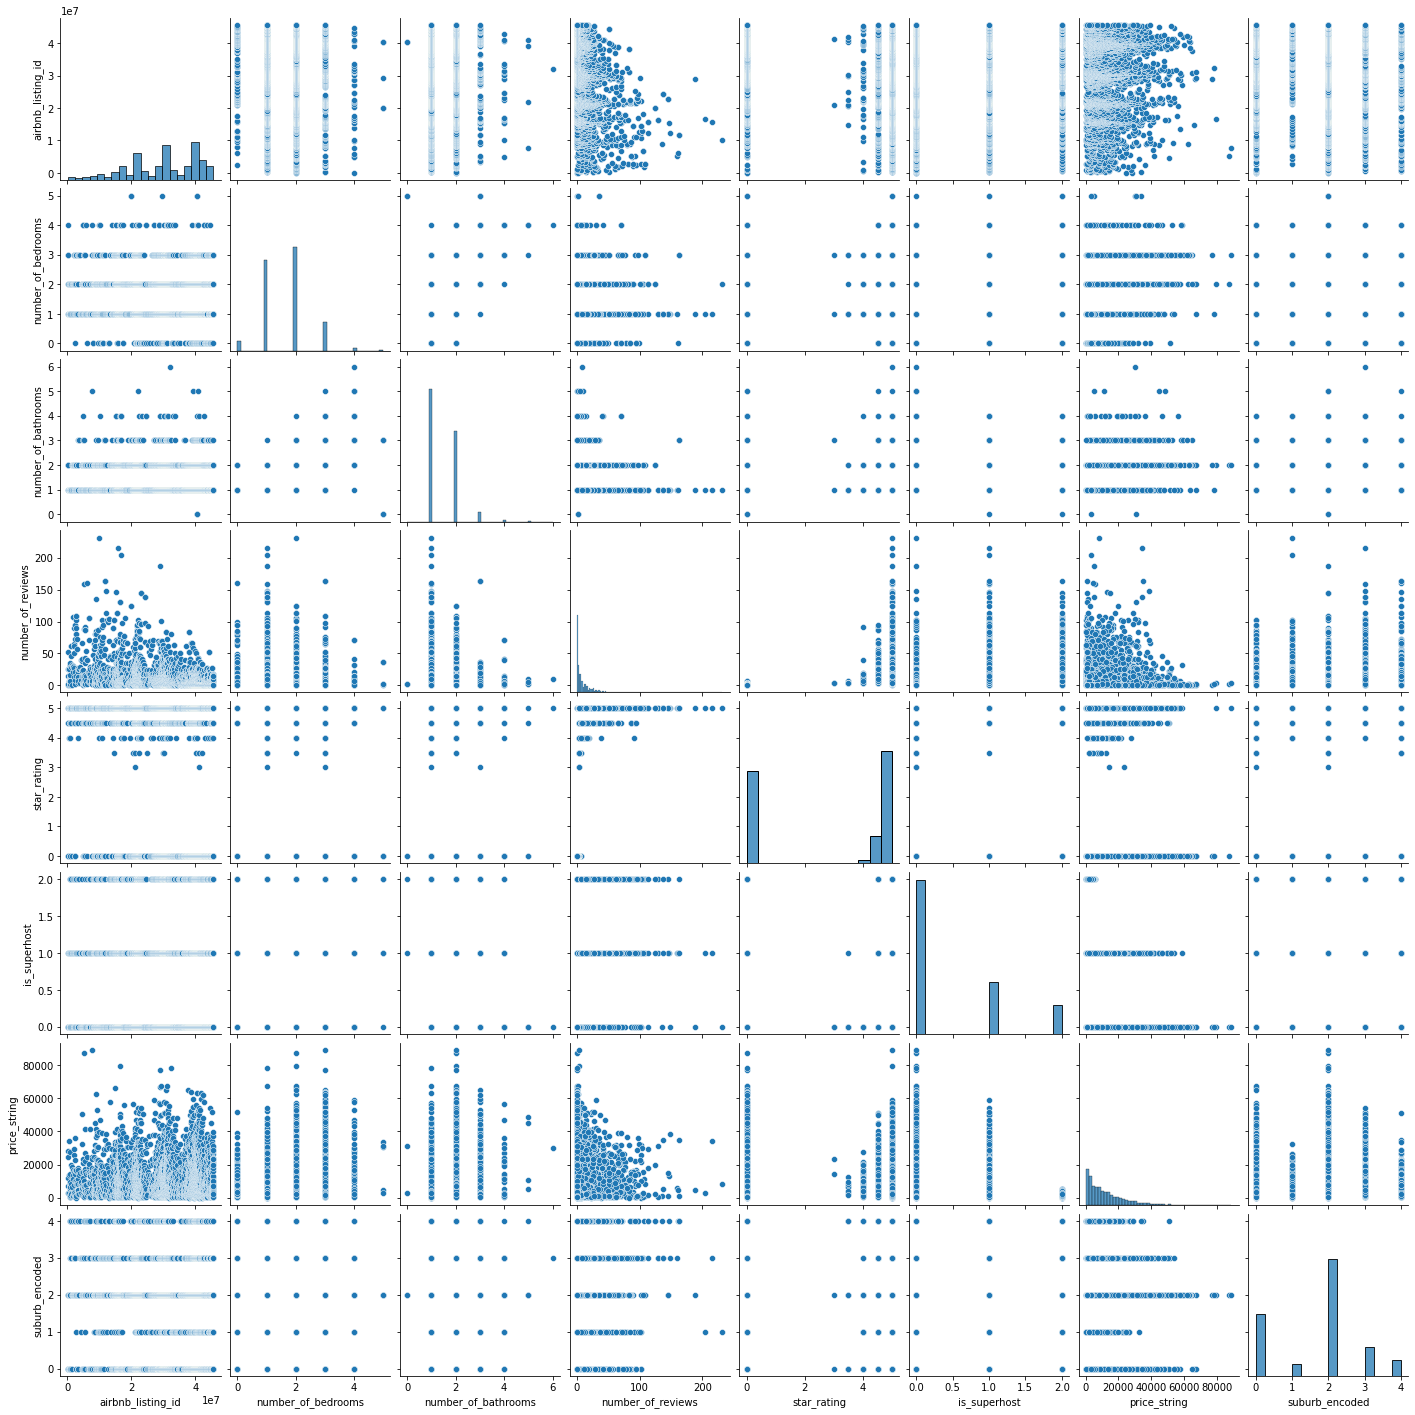

In [79]:
sns.pairplot(faturamento_e_caracteristica);

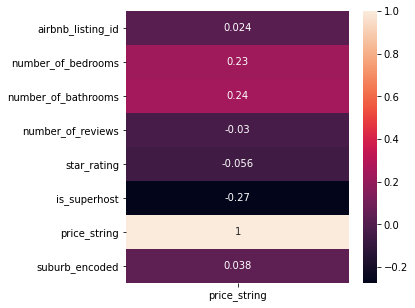

In [78]:
plt.figure(figsize=(5,5))
corr = faturamento_e_caracteristica.corr()
x = corr[["price_string"]]
sns.heatmap(x, annot=True);

In [24]:
faturamento_medio_banheiro = faturamento_e_caracteristica[["number_of_bathrooms", "price_string"]].groupby("number_of_bathrooms").mean().reset_index()
faturamento_medio_banheiro["price_string"] = faturamento_medio_banheiro["price_string"].round(2)
faturamento_medio_banheiro

,number_of_bathrooms,price_string
0,0.0,17025.00
1,1.0,10113.68
2,2.0,14767.45
3,3.0,20579.04
4,4.0,18737.96
5,5.0,27376.00
6,6.0,30300.00


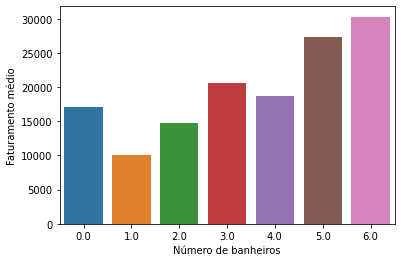

In [25]:
faturamento_banheiro_grafico = sns.barplot(x=faturamento_medio_banheiro["number_of_bathrooms"], y=faturamento_medio_banheiro["price_string"]);
faturamento_banheiro_grafico.set(xlabel="Número de banheiros", ylabel="Faturamento médio")
plt.show()

In [26]:
listing_por_banheiro = faturamento_e_caracteristica[["airbnb_listing_id", "number_of_bathrooms"]].groupby("number_of_bathrooms").count().reset_index()
listing_por_banheiro

,number_of_bathrooms,airbnb_listing_id
0,0.0,2
1,1.0,2052
2,2.0,1400
3,3.0,149
4,4.0,23
5,5.0,4
6,6.0,1


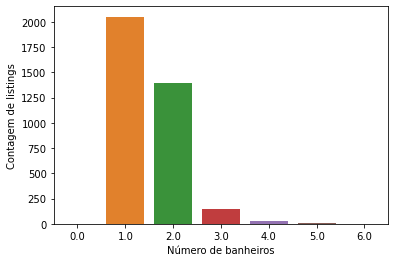

In [27]:
listing_por_banheiro_grafico = sns.barplot(x=listing_por_banheiro["number_of_bathrooms"], y=listing_por_banheiro["airbnb_listing_id"]);
listing_por_banheiro_grafico.set(xlabel="Número de banheiros", ylabel="Contagem de listings")
plt.show()

In [28]:
faturamento_quarto = faturamento_e_caracteristica[["number_of_bedrooms", "price_string"]].groupby("number_of_bedrooms").mean().reset_index()
faturamento_quarto["price_string"] = faturamento_quarto["price_string"].round(2)
faturamento_quarto

,number_of_bedrooms,price_string
0,0.0,9238.42
1,1.0,10000.27
2,2.0,12950.32
3,3.0,18107.75
4,4.0,21354.76
5,5.0,20646.00


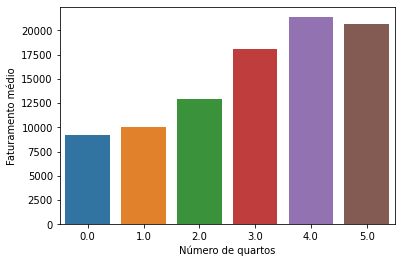

In [29]:
faturamento_quarto_grafico = sns.barplot(x=faturamento_quarto["number_of_bedrooms"], y=faturamento_quarto["price_string"]);
faturamento_quarto_grafico.set(xlabel="Número de quartos", ylabel="Faturamento médio")
plt.show()

In [30]:
listing_por_quarto = faturamento_e_caracteristica[["number_of_bedrooms", "airbnb_listing_id"]].groupby("number_of_bedrooms").count().reset_index()
listing_por_quarto

,number_of_bedrooms,airbnb_listing_id
0,0.0,144
1,1.0,1393
2,2.0,1598
3,3.0,445
4,4.0,46
5,5.0,5


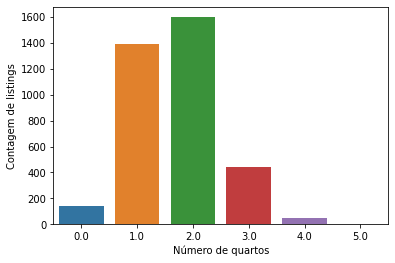

In [31]:
listing_por_quarto_grafico = sns.barplot(x=listing_por_quarto["number_of_bedrooms"], y=listing_por_quarto["airbnb_listing_id"]);
listing_por_quarto_grafico.set(xlabel="Número de quartos", ylabel="Contagem de listings")
plt.show()

In [32]:
faturamento_rating = faturamento_e_caracteristica[["star_rating", "price_string"]].groupby("star_rating").mean().reset_index()
faturamento_rating["price_string"] = faturamento_rating["price_string"].round(2)
faturamento_rating

,star_rating,price_string
0,0.0,13266.63
1,3.0,18682.00
2,3.5,6220.00
3,4.0,9789.07
4,4.5,12266.74
5,5.0,11863.41


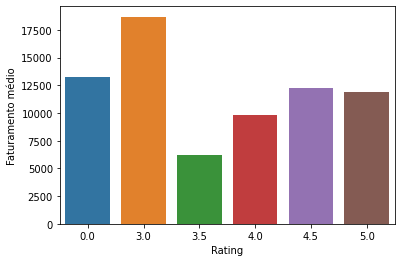

In [33]:
faturamento_rating_grafico = sns.barplot(x=faturamento_rating["star_rating"], y=faturamento_rating["price_string"]);
faturamento_rating_grafico.set(xlabel="Rating", ylabel="Faturamento médio")
plt.show()

In [34]:
listing_por_rating = faturamento_e_caracteristica[["star_rating", "airbnb_listing_id"]].groupby("star_rating").count().reset_index()
listing_por_rating

,star_rating,airbnb_listing_id
0,0.0,1417
1,3.0,2
2,3.5,10
3,4.0,46
4,4.5,428
5,5.0,1728


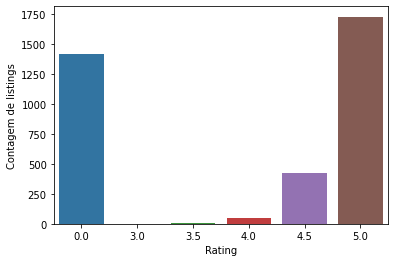

In [35]:
listing_por_rating_grafico = sns.barplot(x=listing_por_rating["star_rating"], y=listing_por_rating["airbnb_listing_id"]);
listing_por_rating_grafico.set(xlabel="Rating", ylabel="Contagem de listings")
plt.show()

In [36]:
faturamento_reviews = faturamento_e_caracteristica[["number_of_reviews", "price_string"]].groupby("number_of_reviews").sum().reset_index()
faturamento_reviews["range_of_reviews"] = pd.cut(faturamento_reviews["number_of_reviews"], np.arange(0, 300, 50))
faturamento_reviews["price_string"] = faturamento_reviews["price_string"].round(2)
faturamento_reviews

,number_of_reviews,price_string,range_of_reviews
0,0.0,10217339.0,NaN
1,1.0,5792119.0,"(0.0, 50.0]"
2,2.0,2699185.0,"(0.0, 50.0]"
3,3.0,2619524.0,"(0.0, 50.0]"
4,4.0,1677722.0,"(0.0, 50.0]"
...,...,...,...
112,163.0,35760.0,"(150.0, 200.0]"
113,188.0,4768.0,"(150.0, 200.0]"
114,205.0,3040.0,"(200.0, 250.0]"
115,215.0,34244.0,"(200.0, 250.0]"


In [37]:
faturamento_medio_reviews = faturamento_reviews[["range_of_reviews", "price_string"]].groupby("range_of_reviews").mean().reset_index()
faturamento_medio_reviews

,range_of_reviews,price_string
0,"(0, 50]",651468.420000
1,"(50, 100]",40320.955556
2,"(100, 150]",28385.857143
3,"(150, 200]",12692.500000
4,"(200, 250]",15144.666667


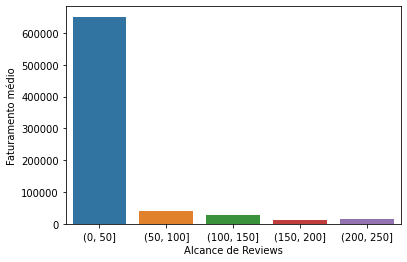

In [38]:
faturamento_rating_reviews = sns.barplot(x=faturamento_medio_reviews["range_of_reviews"], y=faturamento_medio_reviews["price_string"]);
faturamento_rating_reviews.set(xlabel="Alcance de Reviews", ylabel="Faturamento médio")
plt.show()

In [39]:
listing_por_reviews = faturamento_e_caracteristica[["number_of_reviews", "airbnb_listing_id"]].groupby("number_of_reviews").count().reset_index()
listing_por_reviews["range_of_reviews"] = pd.cut(listing_por_reviews["number_of_reviews"], np.arange(0, 300, 50))
listing_por_reviews

,number_of_reviews,airbnb_listing_id,range_of_reviews
0,0.0,761,NaN
1,1.0,426,"(0.0, 50.0]"
2,2.0,227,"(0.0, 50.0]"
3,3.0,201,"(0.0, 50.0]"
4,4.0,149,"(0.0, 50.0]"
...,...,...,...
112,163.0,2,"(150.0, 200.0]"
113,188.0,1,"(150.0, 200.0]"
114,205.0,1,"(200.0, 250.0]"
115,215.0,1,"(200.0, 250.0]"


In [40]:
listing_alcance_reviews = listing_por_reviews[["range_of_reviews", "airbnb_listing_id"]].groupby("range_of_reviews").count().reset_index()
listing_alcance_reviews

,range_of_reviews,airbnb_listing_id
0,"(0, 50]",50
1,"(50, 100]",45
2,"(100, 150]",14
3,"(150, 200]",4
4,"(200, 250]",3


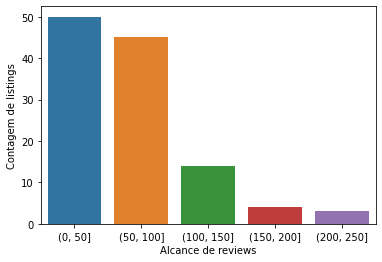

In [41]:
listing_por_reviews_grafico = sns.barplot(x=listing_alcance_reviews["range_of_reviews"], y=listing_alcance_reviews["airbnb_listing_id"]);
listing_por_reviews_grafico.set(xlabel="Alcance de reviews", ylabel="Contagem de listings")
plt.show()

In [42]:
faturamento_superhost = 0
faturamento_nao_superhost = 0
contador_superhost = 0
contador_nao_superhost = 0
for i in range(len(faturamento_e_caracteristica["is_superhost"])):
    if faturamento_e_caracteristica.iloc[i, 5] != 0:
        faturamento_superhost += faturamento_e_caracteristica.iloc[i, 6]
        contador_superhost += 1
    else:
        faturamento_nao_superhost += faturamento_e_caracteristica.iloc[i, 6]
        contador_nao_superhost += 1

faturamento_superhost_medio = faturamento_superhost / contador_superhost
faturamento_nao_superhost_medio = faturamento_nao_superhost / contador_nao_superhost

In [43]:
print("Não Superhost")
print(f"Faturamento médio: {faturamento_nao_superhost_medio:.2f}\nFaturamento total: {faturamento_nao_superhost:.2f}\nNúmero total: {contador_nao_superhost}")

Não Superhost
Faturamento médio: 13883.80
Faturamento total: 33085098.00
Número total: 2383


In [44]:
print("Superhost")
print(f"Faturamento médio: {faturamento_superhost_medio:.2f}\nFaturamento total: {faturamento_superhost:.2f}\nNúmero total: {contador_superhost}")

Superhost
Faturamento médio: 9626.37
Faturamento total: 12013711.00
Número total: 1248


# Questão 4

In [45]:
datas = relacoes_numericas[["airbnb_listing_id", "booked_on", "date"]].groupby(["airbnb_listing_id", "booked_on"], sort=False)["date"].min().sort_values().reset_index()
datas["weekday_rent"] = datas["date"].dt.dayofweek
datas["diferenca"] = (datas.date - datas.booked_on)
datas = datas[datas.diferenca != "0 days"]
datas["diferenca"].mean()

Timedelta('30 days 11:23:11.511035653')

In [46]:
datas_final_de_semana = datas[datas.weekday_rent > 4]
datas_final_de_semana = datas_final_de_semana[datas_final_de_semana.diferenca != "0 days"]
datas_final_de_semana["diferenca"].mean()

Timedelta('32 days 15:15:34.468085106')

In [48]:
datas["int_diff"] = datas["diferenca"].values.astype(np.int64)
datas["int_diff_var"] = datas["int_diff"].var()
datas["int_diff_var"] = pd.to_timedelta(datas["int_diff_var"])
datas

,airbnb_listing_id,booked_on,date,weekday_rent,diferenca,int_diff,int_diff_var
1,1562295,2020-10-19,2020-11-02,0,14 days,1209600000000000,0 days
2,38025601,2020-04-01,2020-11-02,0,215 days,18576000000000000,0 days
5,37323841,2020-10-28,2020-11-02,0,5 days,432000000000000,0 days
8,38741901,2020-10-30,2020-11-02,0,3 days,259200000000000,0 days
10,22267761,2020-09-22,2020-11-02,0,41 days,3542400000000000,0 days
...,...,...,...,...,...,...,...
60398,40404985,2021-03-28,2021-03-30,1,2 days,172800000000000,0 days
60399,7592486,2021-03-29,2021-03-30,1,1 days,86400000000000,0 days
60405,29365104,2021-03-29,2021-03-30,1,1 days,86400000000000,0 days
60408,31352490,2020-04-03,2021-03-30,1,361 days,31190400000000000,0 days
